In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('datasets/13-e16STPhoRadA-regr.csv', skiprows=1,
                 names=['degECFc', 'degECFn', 'SynECF', 'degECF', 'SynGFP', 'degGFP', 'SSE'])
df.head()

,degECFc,degECFn,SynECF,degECF,SynGFP,degGFP,SSE
0,2.929277e-14,4.161247e-14,0.005669,4.316271e-19,4917.189119,0.10884,6.246284e+07
1,1.414069e-14,8.661054e-15,0.005669,8.940203e-17,4917.184897,0.10884,6.246284e+07
2,8.268599e-20,1.254472e-20,0.005669,4.719039e-22,4917.182045,0.10884,6.246284e+07
3,3.316351e-13,4.672636e-19,0.005669,7.270744e-21,4917.180937,0.10884,6.246284e+07
4,1.513165e-15,1.243168e-15,0.005669,3.093753e-18,4917.178318,0.10884,6.246284e+07


In [4]:
df['SSE'].min()

62462842.55014091

In [5]:
X = df.drop('SSE', axis=1)
Y = df['SSE']

X = sm.add_constant(X)
model = sm.OLS(Y, X)

In [6]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SSE   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     262.0
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          7.87e-150
Time:                        13:22:00   Log-Likelihood:                -9971.3
No. Observations:                 500   AIC:                         1.996e+04
Df Residuals:                     493   BIC:                         1.999e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.606e+08   1.83e+07     52.591      0.000    9.25e+08    9.96e+08
degECFc     8.798e+04      8e+04      1.099      0.272   -6.92e+04    2.45e+05
degECFn     9.324e+04   7.01e+04      1.330      0.184   -4.45e+04    2.31e+05
SynECF       1.68e+05    3.7e+04      4.544      0.000    9.54e+04    2.41e+05
degECF     -2.269e+05   6.57e+04     -3.451      0.001   -3.56e+05   -9.77e+04
SynGFP      9.633e+04   8466.872     11.377      0.000    7.97e+04    1.13e+05
degGFP     -1.153e+10   4.38e+08    -26.355      0.000   -1.24e+10   -1.07e+10
==============================================================================
Omnibus:                       64.799   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.690
Skew:                           0.857   Prob(JB):                     6.12e-22
Kurtosis:                       4.322   Cond. No.                     3.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model2 = ols("SSE ~ degECFc + degECFn + SynECF + degECF + SynGFP + degGFP", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SSE   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     262.0
Date:                Wed, 24 Mar 2021   Prob (F-statistic):          7.87e-150
Time:                        13:22:00   Log-Likelihood:                -9971.3
No. Observations:                 500   AIC:                         1.996e+04
Df Residuals:                     493   BIC:                         1.999e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.606e+08   1.83e+07     52.591      0.000    9.25e+08    9.96e+08
degECFc     8.798e+04      8e+04      1.099      0.272   -6.92e+04    2.45e+05
degECFn     9.324e+04   7.01e+04      1.330      0.184   -4.45e+04    2.31e+05
SynECF       1.68e+05    3.7e+04      4.544      0.000    9.54e+04    2.41e+05
degECF     -2.269e+05   6.57e+04     -3.451      0.001   -3.56e+05   -9.77e+04
SynGFP      9.633e+04   8466.872     11.377      0.000    7.97e+04    1.13e+05
degGFP     -1.153e+10   4.38e+08    -26.355      0.000   -1.24e+10   -1.07e+10
==============================================================================
Omnibus:                       64.799   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.690
Skew:                           0.857   Prob(JB):                     6.12e-22
Kurtosis:                       4.322   Cond. No.                     3.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

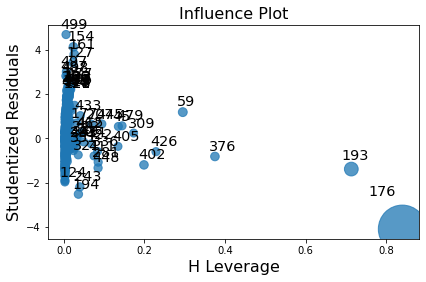

In [21]:
fig = sm.graphics.influence_plot(model2, criterion="cooks")
fig.tight_layout(pad=1.0)

In [8]:
X = df.drop('SSE', axis=1)
Y = df['SSE']

In [9]:
my_model = GradientBoostingRegressor()
my_model.fit(X, Y)

GradientBoostingRegressor()

<Figure size 720x360 with 0 Axes>

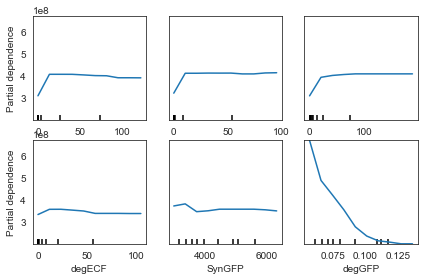

In [12]:
plt.figure(figsize=[10, 5])
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 1, 2, 3, 4, 5], # column numbers of plots we want to show
                                   X=X, method='brute',            # raw predictors data.
                                   grid_resolution=10
                                  )
plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

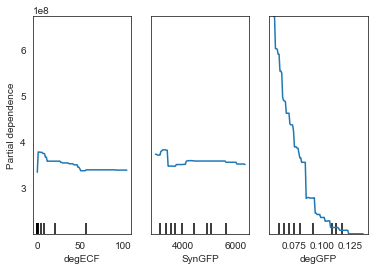

In [11]:
plt.figure(figsize=[10, 5])
my_plots = plot_partial_dependence(my_model,       
                                   features=[3, 4, 5], # column numbers of plots we want to show
                                   X=X, method='brute'            # raw predictors data.
                                  )
plt.show()

In [49]:
-2e8

-200000000.0